# Simulated Data Same Length heartbeat

Data exploration, logistic regression, knn-cross validation 10 fold, and svm

In [1]:
# imports

import numpy as np
import pandas as pd  
from sklearn import preprocessing

# logreg
from sklearn.linear_model import LogisticRegression

# knn
from sklearn.neighbors import KNeighborsClassifier

# cross validation
from sklearn.cross_validation import train_test_split
from sklearn import model_selection
from sklearn.model_selection import cross_val_score

# roc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

# evaluation scrape
from pandas_ml import ConfusionMatrix
from sklearn.metrics import accuracy_score


# plotting
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc("font", size=40)

sns.set()

C:\Users\Lauren\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
cd ../../../Data/fusrp_2/entropy

C:\Users\Lauren\Data\fusrp_2\entropy


In [294]:
ls

 Volume in drive C is OS
 Volume Serial Number is B431-6EAA

 Directory of C:\Users\Lauren\Data\fusrp_2\entropy

08/09/2018  12:04 PM    <DIR>          .
08/09/2018  12:04 PM    <DIR>          ..
08/09/2018  12:04 PM            10,528 12_features_test_db4.npy
08/09/2018  12:04 PM            10,528 12_features_train_db4.npy
08/09/2018  10:14 AM             2,431 ECG200.npy
08/09/2018  08:24 AM            77,934 ECG200_TEST.csv
08/09/2018  08:24 AM            78,026 ECG200_TRAIN.csv
08/09/2018  10:14 AM            18,499 Log_ROC.png
08/09/2018  08:24 AM             3,328 Testing_DB1.npy
08/09/2018  12:00 PM             3,328 Testing_db4.npy
08/09/2018  08:24 AM             3,328 Testing_sym5.npy
08/09/2018  08:24 AM             3,328 Training_DB1.npy
08/09/2018  12:00 PM             3,328 Training_db4.npy
08/09/2018  08:24 AM             3,328 Training_sym5.npy
              12 File(s)        217,914 bytes
               2 Dir(s)  297,922,314,240 bytes free


In [18]:
pw_label_path = 'pwvd_labels.csv'
pw_label = np.ravel(pd.read_csv(pw_label_path, header=None))

In [20]:
pwvd_path = 'PWVD_single_hearbeat.npy'
pwvd = np.load(pwvd_path)

In [21]:
X = pwvd
y = pw_label

In [23]:
X.shape

(100, 33, 733)

### Data Exploration

In [7]:
# load data into a dataframe
# snr_name = "pt5snr.xlsx"
# hb_df = pd.read_excel(snr_name, header=None)

snr_name = "pt5snr_csv_pcadiff.csv"
hb_df = pd.read_csv(snr_name, header=None)

hb_df.head(5)

,0,1,2,3,4,5,6,7,8,9,...,87,88,89,90,91,92,93,94,95,96
0,1,0.42519,1.41860,2.6688,3.2986,2.26460,0.16518,-0.95973,0.28267,0.84285,...,-0.018196,-0.220490,-0.15256,-0.11701,-0.14516,-0.11667,-0.199260,-0.10984,-0.14249,0.098758
1,1,0.65393,2.17730,3.6448,2.2792,0.97837,-0.38830,-0.91191,-0.14833,0.30544,...,0.099883,0.141400,-0.23909,0.24742,-0.08515,0.00780,0.407870,-0.19492,0.17111,0.197030
2,1,0.40495,0.55400,0.7241,1.4490,2.01260,1.62450,1.20470,1.11750,0.56210,...,1.297900,1.243300,1.46360,1.69490,1.45610,1.57040,1.934600,1.49760,0.81257,0.390640
3,1,1.08810,2.01190,2.3017,1.6302,0.63677,-0.14050,0.54795,1.07510,0.89686,...,0.125240,0.071349,0.13820,0.11640,0.13120,0.11941,0.082968,0.15135,0.27392,0.349400
4,-1,0.44362,0.94729,1.9241,2.1598,1.49940,0.96451,0.22326,-0.42495,0.12128,...,0.900510,1.278700,2.31790,2.91630,2.21190,2.03480,2.071300,1.25420,1.03790,1.009600


In [161]:
hb_df.shape

(100, 339)

Since 0 is abnormal and 1 is normal are simulated labelled for column 0, we can pick two and look at them.

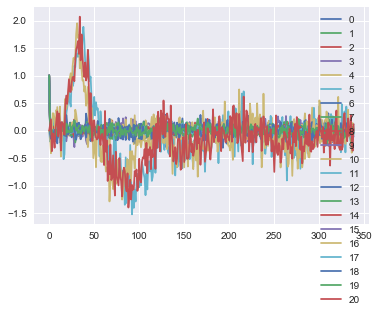

In [162]:
_ = hb_df.loc[0:20].T.plot()

we can also consider the gradient

In [163]:
# the input vectors
X = hb_df.drop(0, axis=1)

In [164]:
# this is the response variable i.e. normal vs abnormal heartbeats
y = np.ravel(hb_df[[0]].values)

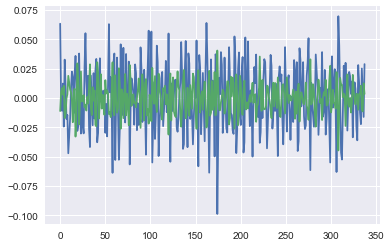

In [165]:
data = X.loc[[0,1]].T.values
_ = plt.plot(np.gradient(data,1)[0])

In [166]:
%%time
# splitting the test and train data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

Wall time: 4 ms


#### UCR raw data

In [226]:
file_name = "ECG200_TEST.csv"
test_df = pd.read_csv(file_name, header=None)

In [227]:
test_df.replace({0: {-1: 0}}, inplace=True)

In [228]:
X_test = test_df.drop(0, axis=1)

In [229]:
y_test = np.ravel(test_df[[0]].values)

In [230]:
file_name = "ECG200_TRAIN.csv"
train_df = pd.read_csv(file_name, header=None)

In [231]:
train_df.replace({0: {-1: 0}}, inplace=True)
train_df.head()

,0,1,2,3,4,5,6,7,8,9,...,87,88,89,90,91,92,93,94,95,96
0,0,0.50206,0.54216,0.72238,1.42890,2.136500,2.28110,1.936300,1.46890,1.00880,...,0.931040,0.61030,0.63889,0.684680,0.583240,0.64052,0.70859,0.705010,0.71382,0.43376
1,1,0.14765,0.80467,0.36777,0.24389,0.026614,-0.27440,0.096731,-0.74773,-1.60980,...,-0.533500,-0.40023,0.17608,1.111800,2.438400,2.73490,1.73610,0.036857,-1.26510,-0.20802
2,0,0.31665,0.24320,0.37047,1.06370,1.678200,1.75960,1.697700,1.61220,1.16820,...,0.764230,0.61062,0.55290,0.566790,0.604000,0.77707,0.81235,0.748850,0.81804,0.53935
3,0,1.16890,2.07590,1.76010,1.60640,1.949000,1.30280,0.459330,0.51641,0.85218,...,0.419010,0.72389,1.32390,2.136500,1.746600,1.47020,1.89350,1.256900,0.80041,0.73154
4,1,0.64866,0.75203,2.63620,3.45570,2.118200,0.52062,-0.188630,0.78082,0.93377,...,-0.097869,-0.13679,-0.34024,-0.089441,-0.080297,-0.19258,-0.30470,-0.454560,0.31459,0.58219


In [232]:
X_train = train_df.drop(0, axis=1)

In [233]:
y_train = np.ravel(train_df[[0]].values)

In [234]:
X = pd.concat([X_train,X_test],ignore_index=True)

In [172]:
y_train

array([0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1], dtype=int64)

In [235]:
y = np.concatenate((y_train, y_test))

#### Entropy

In [357]:
path = "12_features_test_db4.npy"
test_df = pd.DataFrame(np.load(path))
test_df.replace({0: {-1: 0}}, inplace=True)

In [358]:
X_test = test_df.drop(0, axis=1)
y_test = np.ravel(test_df[[0]].values)

In [359]:
path = "12_features_train_db4.npy"
train_df = pd.DataFrame(np.load(path))
train_df.replace({0: {-1: 0}}, inplace=True)
train_df.head()
X_train = train_df.drop(0, axis=1)
y_train = np.ravel(train_df[[0]].values)
X = pd.concat([X_train,X_test],ignore_index=True)
y = np.concatenate((y_train, y_test))

### Building Machine Learning

In [360]:
# from sklearn.neural_network import MLPClassifier

# mlp = MLPClassifier(hidden_layer_sizes=(15,15,15),max_iter=100)

# mlp.fit(X_train,y_train)

# y_pred = mlp.predict(X_test)
# cm_logreg = ConfusionMatrix(y_test, y_pred)
# cm_logreg.plot(normalized=True)
# plt.show()

### Logistic Regression

In [361]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

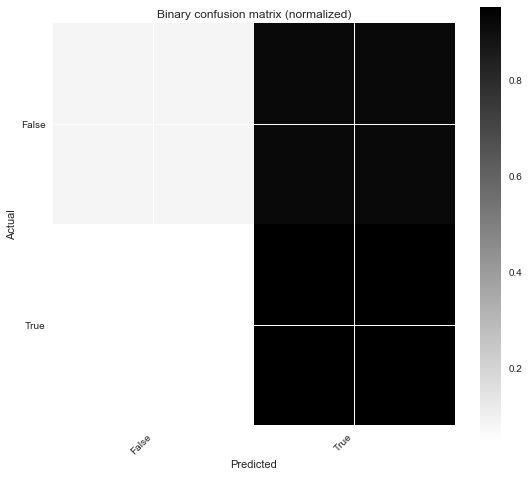

In [362]:
y_pred = logreg.predict(X_test)

# looking at the confusion matrix plot
cm_logreg = ConfusionMatrix(y_test, y_pred)
cm_logreg.plot(normalized=True)
plt.show()

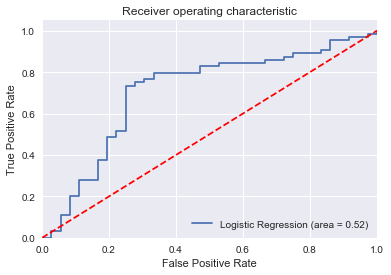

In [363]:
# plotting the ROC
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### KNN-CV

In [364]:
%%time
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression()
scoring = 'f1'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)

Wall time: 44 ms


In [365]:
results

array([0.66666667, 0.82352941, 0.75      , 0.88888889, 0.57142857,
       0.875     , 0.88888889, 0.94117647, 0.66666667, 0.8       ])

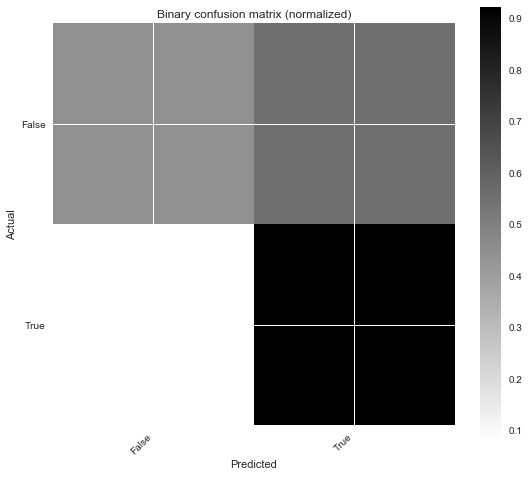

In [366]:
knn = KNeighborsClassifier(n_neighbors=5)

# fitting the model
knn.fit(X_train, y_train)
# predict the response
y_pred = knn.predict(X_test)

# evaluate accuracy
cm_knn = ConfusionMatrix(y_test, y_pred)
cm_knn.plot(normalized=True)
plt.show()

In [367]:
from sklearn.cross_validation import cross_val_score
knn = KNeighborsClassifier(n_neighbors=10)
scores = cross_val_score(knn, X, y, cv=10, scoring='f1')
print(scores)

[0.93333333 0.8        0.82758621 0.88       0.78571429 0.75
 0.86666667 0.78571429 0.8        0.92307692]


In [368]:
%%time
# search for an optimal value of K for KNN

# range of k we want to try
k_range = range(1, 31)
# empty list to store scores
k_scores = []

# 1. we will loop through reasonable values of k
for k in k_range:
    # 2. run KNeighborsClassifier with k neighbours
    knn = KNeighborsClassifier(n_neighbors=k)
    # 3. obtain cross_val_score for KNeighborsClassifier with k neighbours
    scores = cross_val_score(knn, X, y, cv=10, scoring='f1')
    # 4. append mean of scores for k neighbors to k_scores list
    k_scores.append(scores.mean())

print(k_scores)
print(max(k_scores))

[0.759030970276412, 0.7306355563477002, 0.8161074481074481, 0.8146792977137804, 0.8356006062902616, 0.8277390846701191, 0.8397573996884342, 0.8347743954640506, 0.8425970003300369, 0.8352091701402046, 0.8366938664269032, 0.8422584171894515, 0.8177985488330316, 0.8220940170940171, 0.8261583100292776, 0.8130431841466323, 0.8300292777712132, 0.8310691769401446, 0.8472993356703034, 0.8363052240471595, 0.8473648846930271, 0.8389412103983849, 0.8338512282221959, 0.8306369425079101, 0.8275671770243516, 0.819328393190462, 0.8255987862197539, 0.8310154528864204, 0.829536544697835, 0.834003958633547]
0.8473648846930271
Wall time: 1.36 s


### SVM

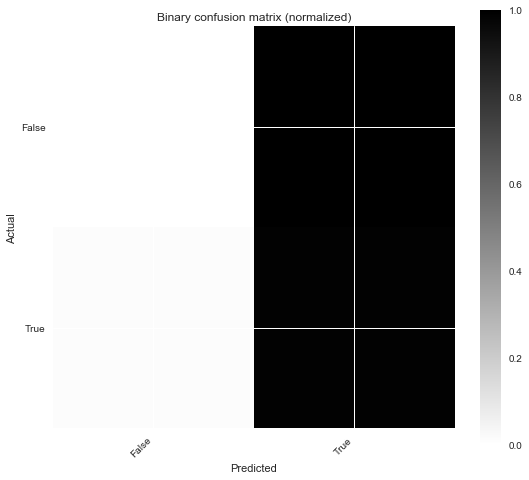

In [369]:
from sklearn import svm
clf = svm.SVC(gamma=0.001, C=100.)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
# evaluate accuracy
cm_svm = ConfusionMatrix(y_test, y_pred)
cm_svm.plot(normalized=True)
plt.show()

### Model Comparison

In [370]:
methods = ['logreg', 'knncv', 'svm']
cms = np.array((cm_logreg, cm_knn, cm_svm),dtype=object)

In [371]:
cm_knn.print_stats()

population: 100
P: 64
N: 36
PositiveTest: 79
NegativeTest: 21
TP: 59
TN: 16
FP: 20
FN: 5
TPR: 0.921875
TNR: 0.4444444444444444
PPV: 0.7468354430379747
NPV: 0.7619047619047619
FPR: 0.5555555555555556
FDR: 0.25316455696202533
FNR: 0.078125
ACC: 0.75
F1_score: 0.8251748251748252
MCC: 0.43169599168995776
informedness: 0.3663194444444444
markedness: 0.5087402049427365
prevalence: 0.64
LRP: 1.6593749999999998
LRN: 0.17578125
DOR: 9.44
FOR: 0.23809523809523808


In [372]:
# y_true = np.random.choice([0,1], (3000,), p=[1/2,1/2])
# y_pred = np.random.choice([0,1], (3000,), p=[1/2,1/2])
# cm_knn = ConfusionMatrix(y_true, y_pred)
# y_true = np.random.choice([0,1], (3000,), p=[1/3,2/3])
# y_pred = np.random.choice([0,1], (3000,), p=[1/3,2/3])
# cm_logreg = ConfusionMatrix(y_true, y_pred)
# y_true = np.random.choice([0,1], (3000,), p=[1/4,3/4])
# y_pred = np.random.choice([0,1], (3000,), p=[1/4,3/4])
# cm_svm = ConfusionMatrix(y_true, y_pred)
# cms = np.array((cm_logreg, cm_knn, cm_svm),dtype=object)

In [373]:
cm_knn.F1_score

0.8251748251748252

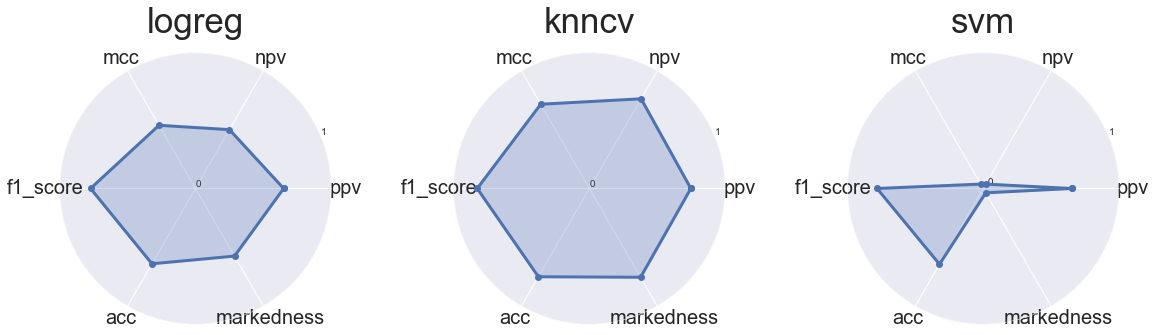

In [374]:
labels = ['ppv', 'npv', 'mcc', 'f1_score', 'acc', 'markedness']
tbl = [(cm.PPV, cm.NPV, (cm.MCC+1)/2, cm.F1_score, cm.ACC, (cm.markedness+1)/2) for cm in cms]
for index, cm in enumerate(cms):
    if (cm.to_array()[0][0] == 0) or (cm.to_array()[0][0] == 1):
        tbl[index] = (cm.PPV, cm.NPV, 0, cm.F1_score, cm.ACC, 0)
df = pd.DataFrame(data=tbl, columns=labels)

fig = plt.figure(figsize=(20,5))
for index in range(len(cms)):
    stats = df.loc[index]
    angles = np.linspace(0, 2*np.pi, len(labels), endpoint=False)
    # close the plot
    stats=np.concatenate((stats,[stats[0]]))
    angles=np.concatenate((angles,[angles[0]]))
    
    ax = fig.add_subplot(131+index, polar=True)
    ax.plot(angles, stats, 'o-', linewidth=3)
    ax.fill(angles, stats, alpha=0.25)
    ax.set_thetagrids(angles * 180/np.pi, labels, fontsize=20)
    ax.set_title(methods[index], fontsize=35)
    ax.set_rticks([0,1])
    ax.grid(True)

In [375]:
zeros = np.zeros((3,6))

In [376]:
from scipy.spatial import distance
scores = [distance.euclidean(vals, zeros[0]) for vals in tbl]

In [377]:
# scores_need_to_save = {}
# scores_need_to_save[snr_name[:snr_name.index(".")]] = scores

In [378]:
name = "ECG200_db4_12"
scores_need_to_save[name] = tbl

In [379]:
# scores_need_to_save

In [380]:
path = 'ECG200.npy'

In [381]:
np.save(path, scores_need_to_save)

In [382]:
read_dictionary = np.load(path).item()
print(read_dictionary) 

{'ECG200_db1': [(0.7272727272727273, 0.5833333333333334, 0.609120537530468, 0.8152866242038217, 0.71, 0.6553030303030303), (0.8611111111111112, 0.75, 0.7966402346427286, 0.8794326241134752, 0.83, 0.8055555555555556), (0.47609999999999997, 0.21389999999999998, 0, 0.5634319526627218, 0.69, 0)], 'ECG200_sym5': [(0.47609999999999997, 0.21389999999999998, 0, 0.5634319526627218, 0.69, 0), (0.8026315789473685, 0.6666666666666666, 0.7166835587633203, 0.8413793103448276, 0.77, 0.7346491228070176), (0.47609999999999997, 0.21389999999999998, 0, 0.5634319526627218, 0.69, 0)], 'ECG200_raw': [(0.859375, 0.75, 0.8046875, 0.859375, 0.82, 0.8046875), (0.8970588235294118, 0.90625, 0.8903379255587311, 0.9242424242424242, 0.9, 0.9016544117647058), (0.8636363636363636, 0.7941176470588235, 0.8245665043953259, 0.8769230769230769, 0.84, 0.8288770053475936)], 'ECG200_db4': [(0.47609999999999997, 0.21389999999999998, 0, 0.5634319526627218, 0.69, 0), (0.7402597402597403, 0.4782608695652174, 0.5994182917158946, 0

In [383]:
path = "ECG200.npy"
read_dictionary = np.load(path).item()
print(read_dictionary)

{'ECG200_db1': [(0.7272727272727273, 0.5833333333333334, 0.609120537530468, 0.8152866242038217, 0.71, 0.6553030303030303), (0.8611111111111112, 0.75, 0.7966402346427286, 0.8794326241134752, 0.83, 0.8055555555555556), (0.47609999999999997, 0.21389999999999998, 0, 0.5634319526627218, 0.69, 0)], 'ECG200_sym5': [(0.47609999999999997, 0.21389999999999998, 0, 0.5634319526627218, 0.69, 0), (0.8026315789473685, 0.6666666666666666, 0.7166835587633203, 0.8413793103448276, 0.77, 0.7346491228070176), (0.47609999999999997, 0.21389999999999998, 0, 0.5634319526627218, 0.69, 0)], 'ECG200_raw': [(0.859375, 0.75, 0.8046875, 0.859375, 0.82, 0.8046875), (0.8970588235294118, 0.90625, 0.8903379255587311, 0.9242424242424242, 0.9, 0.9016544117647058), (0.8636363636363636, 0.7941176470588235, 0.8245665043953259, 0.8769230769230769, 0.84, 0.8288770053475936)], 'ECG200_db4': [(0.47609999999999997, 0.21389999999999998, 0, 0.5634319526627218, 0.69, 0), (0.7402597402597403, 0.4782608695652174, 0.5994182917158946, 0

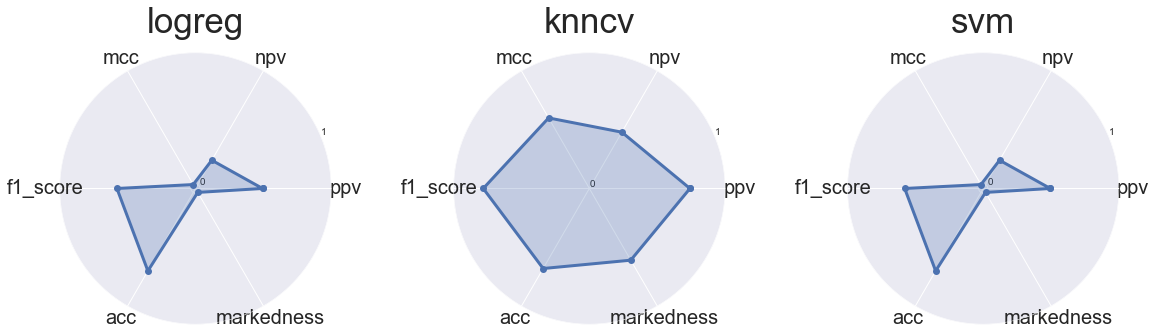

In [384]:
tbl = read_dictionary['ECG200_db4']
df = pd.DataFrame(data=tbl, columns=labels)

fig = plt.figure(figsize=(20,5))
for index in range(len(cms)):
    stats = df.loc[index]
    angles = np.linspace(0, 2*np.pi, len(labels), endpoint=False)
    # close the plot
    stats=np.concatenate((stats,[stats[0]]))
    angles=np.concatenate((angles,[angles[0]]))
    
    ax = fig.add_subplot(131+index, polar=True)
    ax.plot(angles, stats, 'o-', linewidth=3)
    ax.fill(angles, stats, alpha=0.25)
    ax.set_thetagrids(angles * 180/np.pi, labels, fontsize=20)
    ax.set_title(methods[index], fontsize=35)
    ax.set_rticks([0,1])
    ax.grid(True)